# Machine Learning Day 1 Lab 

**1.Mr Arun wants to start his own mobile phone company and he wants to wage an uphill battle with big smartphone brands like Samsung and Apple. But he doesn’t know how to estimate the price of a mobile that can cover both marketing and manufacturing costs. So in this task, you don’t have to predict the actual prices of the mobiles but you have to predict the price range of the mobiles.**

a)	Read the Mobile price dataset  using the Pandas module 

b)	print the 1st five rows. 

c)	Basic statistical computations on the data set or distribution of data

d)	the columns and their data types

e)	Detects null values in the dataset. If there is any null values replaced it with mode value

f)	Explore the data set using   heatmap

g)	Split the data in to test and train 

h)	Fit in to the model Naive Bayes Classifier

i)	Predict the model

j)	Find the accuracy of the model


   price  ram  internal_memory  px_width  px_height  px_density  \
0    199    3               16       720       1280         294   
1    250    4               32      1080       1920         401   
2    299    4               64      1080       1920         401   
3    399    6              128      1440       2560         515   
4    499    8              256      1440       2560         515   

   battery_power   talk_time  three_g   four_g   wifi   dual_sim  nfc  \
0           1580          17        1        1      1          1    1   
1           2200          20        1        1      1          1    1   
2           2500          22        1        1      1          1    1   
3           3000          25        1        1      1          1    1   
4           3500          28        1        1      1          1    1   

   touch_screen  android_version  
0             1              6.0  
1             1              7.0  
2             1              7.0  
3             1   

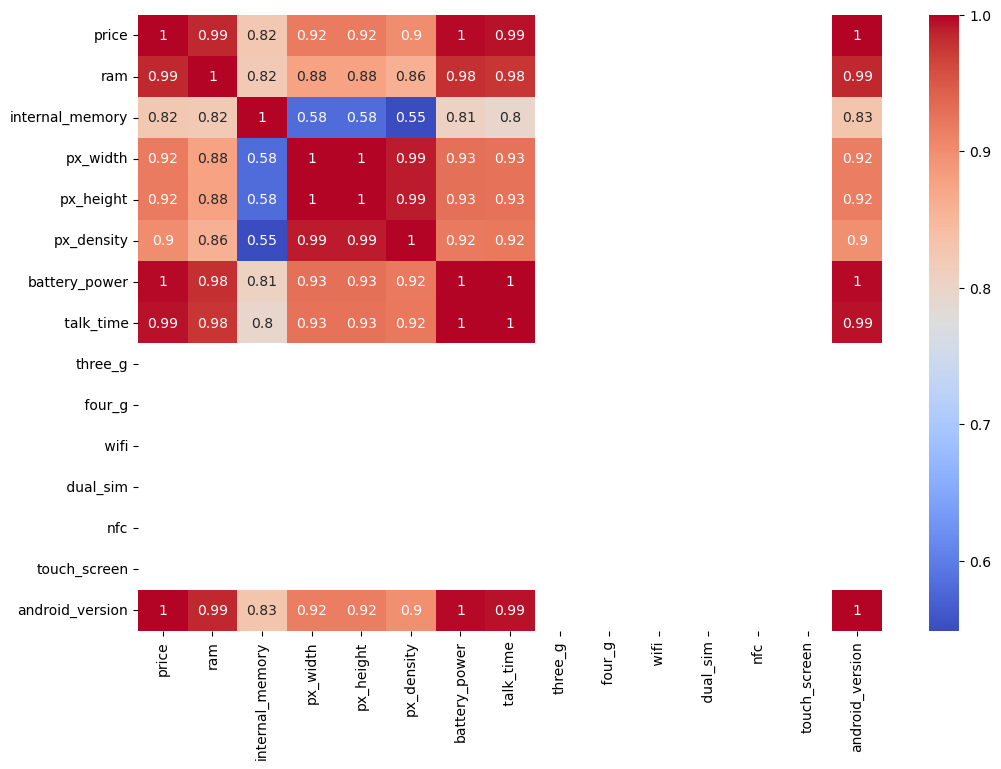

Accuracy of the model: 0.67


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# a) Read the Mobile price dataset using the Pandas module
df = pd.read_csv('/Users/sunilshurajnthiyanandan/Documents/sunil_clg/machine_Learning/Data/mobilePriceData.csv')

# b) Print the 1st five rows
print(df.head())

# c) Basic statistical computations on the dataset or distribution of data
print(df.describe())

# d) The columns and their data types
print(df.dtypes)

# e) Detect null values in the dataset. If there is any null values, replace it with the mode value
print(df.isnull().sum())
for column in df.columns:
    if df[column].isnull().sum() > 0:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

# f) Explore the dataset using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# g) Split the data into test and train
df['price_range'] = pd.cut(df['price'], bins=[0, 300, 600, 900, 1200], labels=[0, 1, 2, 3])

X = df.drop(['price', 'price_range'], axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# h) Fit into the model Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# i) Predict the model
y_pred = nb_model.predict(X_test)

# j) Find the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

**2.Implement a Python program for  the most specific hypothesis using Find-S algorithm for the following given dataset and show the output:**

Example	Sky	Air Temp	Humidity	Wind	Water	Forecast	Enjoy Sport

1	Sunny	Warm	Normal	Strong	Warm	Same	Yes

2	Sunny	Warm	High	Strong	Warm	Same	Yes

3	Rainy	Cold	High	Strong	Warm	Change	No

4	Sunny	Warm	High	Strong	Cool	Change	Yes




In [2]:
import pandas as pd

data = {
    'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny'],
    'AirTemp': ['Warm', 'Warm', 'Cold', 'Warm'],
    'Humidity': ['Normal', 'High', 'High', 'High'],
    'Wind': ['Strong', 'Strong', 'Strong', 'Strong'],
    'Water': ['Warm', 'Warm', 'Warm', 'Cool'],
    'Forecast': ['Same', 'Same', 'Change', 'Change'],
    'EnjoySport': ['Yes', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

print("Dataset:")
print(df)

def find_s_algorithm(df):
    hypothesis = None
    for i in range(len(df)):
        if df['EnjoySport'][i] == 'Yes':
            hypothesis = df.iloc[i, :-1].tolist()
            break
    
    for i in range(len(df)):
        if df['EnjoySport'][i] == 'Yes':
            for j in range(len(hypothesis)):
                if hypothesis[j] != df.iloc[i, :-1].tolist()[j]:
                    hypothesis[j] = '?'
    
    return hypothesis

#Find-S algorithm
most_specific_hypothesis = find_s_algorithm(df)

print("\nMost Specific Hypothesis:")
print(most_specific_hypothesis)

Dataset:
     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes

Most Specific Hypothesis:
['Sunny', 'Warm', '?', 'Strong', '?', '?']


**3.Develop a Python code for implementing Linear regression and show its performance**

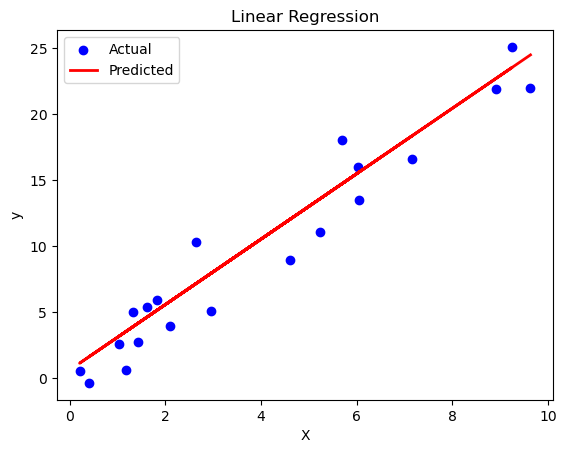

Mean Squared Error: 4.173733526278071
R-squared: 0.9295849975491168


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(0)
X = np.random.rand(100, 1) * 10  
y = 2.5 * X + np.random.randn(100, 1) * 2 
df = pd.DataFrame(data={'X': X.flatten(), 'y': y.flatten()})
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


**4.Develop a Python code for implementing the KNN algorithm with an example.**

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = {
    'Feature1': [2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
    'Feature2': [4, 2, 4, 6, 4, 6, 8, 6, 8, 10],
    'Label':    ['A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B']
    }
df = pd.DataFrame(data)
def knn_predict(df, query, k):
    distances = []
    for index, row in df.iterrows():
        distance = np.sqrt((row['Feature1'] - query[0]) ** 2 + (row['Feature2'] - query[1]) ** 2)
    distances.append((distance, row['Label']))
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = sorted_distances[:k]
    k_nearest_labels = [label for _, label in k_nearest_neighbors]
    majority_vote = Counter(k_nearest_labels).most_common(1)[0][0]
    return majority_vote
query_point = [5, 5]
k = 3
prediction = knn_predict(df, query_point, k)
print(f'Predicted class for query point {query_point}: {prediction}')
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
predictions = []
for point in X_test:
    predictions.append(knn_predict(pd.DataFrame({'Feature1': X_train[:,0], 'Feature2': X_train[:,1], 'Label': y_train}), point, k))
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Predicted class for query point [5, 5]: B
Accuracy: 0.5


**5.Develop a Python code for implementing the Expectation Maximization algorithm with an example**


In [5]:
import numpy as np
import pandas as pd
np.random.seed(0)
data = np.concatenate((np.random.normal(0, 1, 100), np.random.normal(5, 1, 100)))
df = pd.DataFrame(data, columns=['Data'])
def initialize_parameters(k):
    weights = np.ones(k) / k
    means = np.random.choice(df['Data'], k)
    variances = np.random.random(k)
    return weights, means, variances
def expectation_step(df, weights, means, variances, k):
    N = df.shape[0]
    responsibilities = np.zeros((N, k))
    for i in range(k):
        responsibilities[:,i] = weights[i] * (1 / np.sqrt(2 * np.pi * variances[i])) * np.exp(
            -0.5 * ((df['Data'] - means[i]) ** 2 / variances[i]))
    responsibilities /= responsibilities.sum(axis=1)[:,np.newaxis]
    return responsibilities
def maximization_step(df, responsibilities, k):
    Nk = responsibilities.sum(axis=0)
    weights = Nk / df.shape[0]
    means = (responsibilities * df['Data'].values[:, np.newaxis]).sum(axis=0) / Nk
    variances = (responsibilities * (df['Data'].values[:, np.newaxis] - means) ** 2).sum(axis=0) / Nk
    return weights, means, variances
def em_algorithm(df, k, iterations):
    weights, means, variances = initialize_parameters(k)
    log_likelihoods = []
    for _ in range(iterations):
        responsibilities = expectation_step(df, weights, means, variances, k)
        weights, means, variances = maximization_step(df, responsibilities, k)
    log_likelihood = np.sum(np.log(np.sum(responsibilities, axis=1)))
    log_likelihoods.append(log_likelihood)
    return weights, means, variances, log_likelihoods
k = 2  
iterations = 100
weights, means, variances, log_likelihoods = em_algorithm(df, k, iterations)
print("Weights:", weights)
print("Means:", means)
print("Variances:", variances)


Weights: [0.49752742 0.50247258]
Means: [0.05250199 5.06453374]
Variances: [1.01377198 1.12339566]


**6.Implement a Python program for the most specific hypothesis using Find-S algorithm for the following given dataset and show the output:**
Origin	Manufacturer	Color	Decade	Type	Example Type

Japan	Honda	Blue	1980	Economy	Positive

Japan	Toyota	Green	1970	Sports	Negative

Japan	Toyota	Blue	1990	Economy	Positive

USA	    Chrysler Red	1980	Economy	Negative

Japan	Honda	White	1980	Economy	Positive


In [6]:
import pandas as pd
data = {
    'Origin': ['Japan', 'Japan', 'Japan', 'USA', 'Japan'],
    'Manufacturer': ['Honda', 'Toyota', 'Toyota', 'Chrysler', 'Honda'],
    'Color': ['Blue', 'Green', 'Blue', 'Red', 'White'],
    'Decade': [1980, 1970, 1990, 1980, 1980],
    'Type': ['Economy', 'Sports', 'Economy', 'Economy', 'Economy'],
    'Example Type': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

df = pd.DataFrame(data)
hypothesis = ['Ø', 'Ø', 'Ø', 'Ø', 'Ø']
for index, row in df.iterrows():
    if row['Example Type'] == 'Positive':
        for i in range(len(hypothesis)):
            if hypothesis[i] == 'Ø':
                hypothesis[i] = row[i]
            elif hypothesis[i] != row[i]:
                hypothesis[i] = '?'
print("The most specific hypothesis is:", hypothesis)


The most specific hypothesis is: ['Japan', '?', '?', '?', 'Economy']


**7.John is a young professional who wants to buy his first home. He knows that his credit score is an important factor in determining whether he will be approved for a loan, so he decides to check it. He goes to a financial website that offers a free credit score prediction service based on machine learning algorithms**

First five rows of the dataset:
  Occupation  Credit Score
0   Engineer           720
1     Doctor           680
2     Artist           650
3   Engineer           700
4     Artist           710

Basic statistical computations:
       Credit Score
count      10.00000
mean      693.00000
std        35.91657
min       640.00000
25%       665.00000
50%       695.00000
75%       717.50000
max       750.00000

Columns and their data types:
Occupation      object
Credit Score     int64
dtype: object

Null values in the dataset:
Occupation      0
Credit Score    0
dtype: int64

Null values after insertion:
Occupation      0
Credit Score    1
dtype: int64

Dataset after handling null values:
  Occupation  Credit Score
0   Engineer         720.0
1     Doctor         680.0
2     Artist         640.0
3   Engineer         700.0
4     Artist         710.0
5     Doctor         690.0
6   Engineer         730.0
7     Artist         640.0
8     Doctor         660.0
9   Engineer         750.0


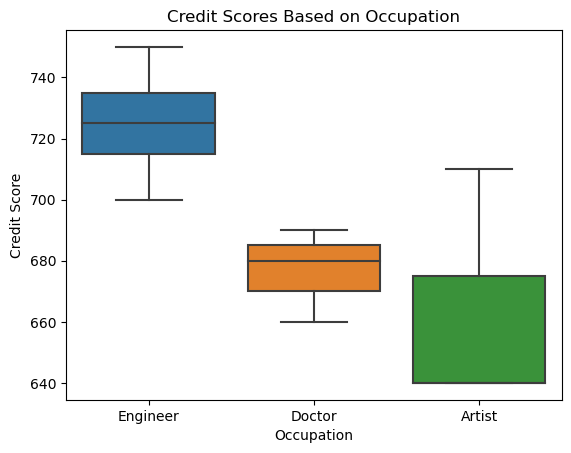


Predicted values for the test set:
[690. 690.]
Model Accuracy: 0.0


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
data = {
    'Occupation': ['Engineer', 'Doctor', 'Artist', 'Engineer', 'Artist', 'Doctor', 'Engineer', 'Artist', 'Doctor', 'Engineer'],
    'Credit Score': [720, 680, 650, 700, 710, 690, 730, 640, 660, 750]
}
df = pd.DataFrame(data)
print("First five rows of the dataset:")
print(df.head())
print("\nBasic statistical computations:")
print(df.describe())
print("\nColumns and their data types:")
print(df.dtypes)
print("\nNull values in the dataset:")
print(df.isnull().sum())
df.at[2, 'Credit Score'] = None
print("\nNull values after insertion:")
print(df.isnull().sum())
mode_value = df['Credit Score'].mode()[0]
df['Credit Score'].fillna(mode_value, inplace=True)
print("\nDataset after handling null values:")
print(df)
sns.boxplot(x='Occupation', y='Credit Score', data=df)
plt.title('Credit Scores Based on Occupation')
plt.show()
X = pd.get_dummies(df['Occupation'], drop_first=True) 
y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nPredicted values for the test set:")
print(y_pred)
print(f"Model Accuracy: {accuracy}")


**8.Develop a Python code for implementing Logistic regression and show its performance**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = {
    'feature1': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    'feature2': [1, 1, 2, 3, 5, 8, 13, 21, 34, 55],
    'label': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.6666666666666666
Confusion Matrix:
[[1 0]
 [1 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

